<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/1ST_PROJECT_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install missingno
!pip install git+https://github.com/quantopian/pyfolio
!pip install pyportfolioopt

     |████████████████████████████████| 6.3 MB 8.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-dcthe0i7
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-dcthe0i7
     |████████████████████████████████| 52 kB 1.5 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=bccde228c33a2ec20586852e6af984b13e1789a4889648b481211cfc8d869a09
  Stored in directory: /tmp/pip-ephem-wheel-cache-3loanz_j/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=d19ac71e171735f0185177a2f63487fa99b657ffe52164e245865baf4c2be042
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully b

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as no
import yfinance as yf
import pyfolio as pf

In [ ]:
url='https://en.wikipedia.org/wiki/NIFTY_50'
df= pd.read_html(url)

In [ ]:
stocks= list(df[1].Symbol)
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [ ]:
stocks

['ADANIPORTS',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BHARTIARTL',
 'BPCL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFC',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBIN',
 'SBILIFE',
 'SHREECEM',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'UPL',
 'WIPRO']

In [ ]:
tickets=[i +'.NS' for i in stocks]

In [ ]:
tickets.append('^NSEI')
tickets

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BHARTIARTL.NS',
 'BPCL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFC.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'IOC.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'UPL.NS',
 'WIPRO.NS',
 '^NSEI']

In [ ]:
portfolio= yf.download(tickers=tickets,rounding=True,period='2y')['Adj Close'].dropna()
portfolio.head()

[*********************100%***********************]  51 of 51 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFC.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,IOC.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-18,359.14,1717.33,722.95,2920.24,9096.94,4138.68,407.76,431.55,2979.76,456.89,163.18,1716.06,2694.65,2117.73,762.90,546.61,2167.69,1256.61,568.77,2400.06,191.29,1993.72,496.90,1367.66,675.00,108.05,226.66,239.73,1626.39,1294.02,564.89,6990.60,13610.95,101.09,120.65,126.76,1435.47,997.22,322.13,19737.49,415.96,301.32,170.10,390.94,2089.28,696.17,1147.32,4093.41,535.89,247.89,11884.5
2019-11-19,357.57,1699.90,747.80,2924.08,9145.45,4119.61,437.81,429.23,2960.26,468.29,162.61,1712.85,2700.56,2144.34,779.40,543.52,2144.23,1266.42,569.02,2367.51,190.05,1975.83,492.06,1385.92,682.33,108.41,225.35,238.10,1622.99,1295.21,552.04,6938.40,13641.43,101.00,120.07,129.96,1485.20,933.90,327.38,19874.08,417.29,298.56,167.75,383.03,2046.77,706.68,1151.68,4067.42,538.09,248.83,11940.1
2019-11-20,360.17,1702.03,748.75,2925.32,9071.96,4122.40,435.76,450.44,2956.42,478.71,165.42,1743.39,2794.73,2118.95,782.87,542.64,2133.42,1267.86,573.01,2368.99,188.47,1964.92,493.55,1462.09,682.47,106.70,226.62,238.87,1598.66,1309.48,551.84,7044.07,13749.22,100.75,120.47,130.39,1522.48,937.04,325.79,20155.35,440.90,302.80,167.40,380.12,2046.53,714.32,1151.33,4081.20,539.65,247.34,11999.1
2019-11-21,365.47,1698.91,737.40,2949.33,9047.83,4107.56,424.80,425.22,2915.01,481.59,160.16,1727.03,2834.70,2164.78,772.26,544.46,2142.53,1277.82,587.52,2343.05,186.35,1986.40,496.80,1439.05,682.71,105.07,222.10,235.55,1594.46,1320.77,543.33,6912.40,13701.68,99.24,118.18,130.52,1512.60,926.97,328.32,20160.07,438.11,297.87,164.15,367.15,2055.80,708.53,1136.87,4044.70,531.79,246.00,11968.4
2019-11-22,364.83,1661.78,732.10,2916.03,9032.04,4062.38,419.17,421.33,2867.58,474.99,162.12,1713.49,2826.82,2243.52,786.39,533.99,2168.66,1259.30,584.67,2341.28,187.98,1966.72,495.35,1439.05,663.52,105.80,223.86,241.32,1568.32,1307.44,537.62,6953.17,13694.00,101.39,120.61,132.15,1521.35,939.98,326.29,20163.05,442.96,295.70,162.35,381.36,2010.76,698.39,1124.35,4048.57,520.76,241.58,11914.4


In [ ]:
portfolio.columns
portfolio.shape

(497, 51)

In [ ]:
# no.matrix(portfolio)

In [ ]:
portfolio.shape

(497, 51)

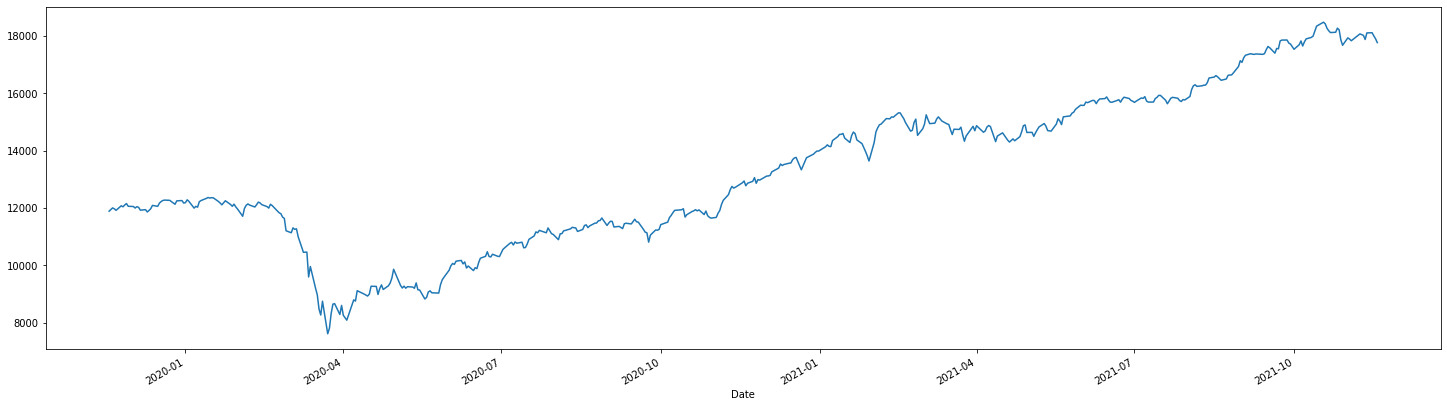

In [278]:
portfolio['^NSEI'].plot(kind='line',figsize=(25,7))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  


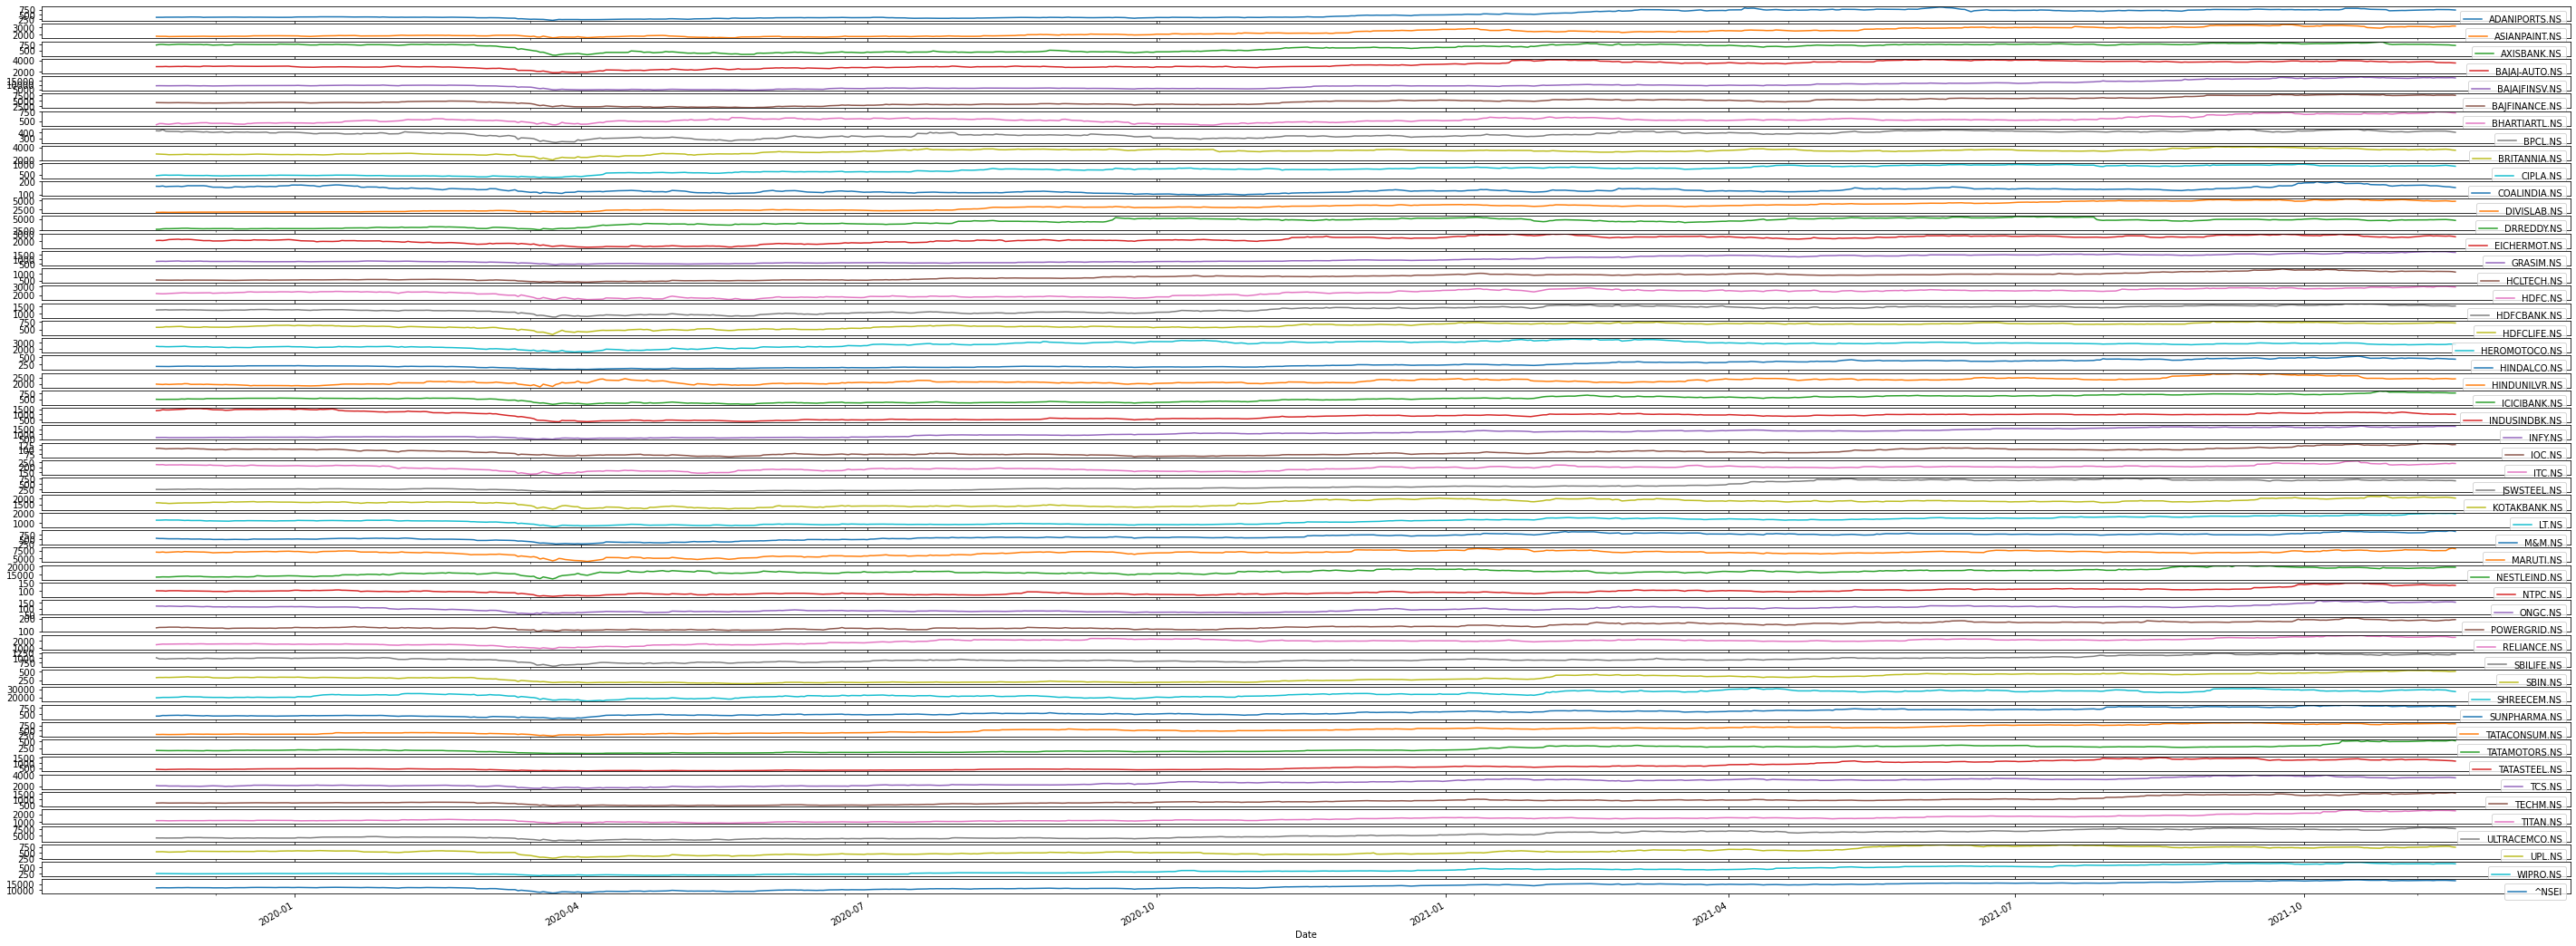

In [ ]:
portfolio.plot(subplots=True,kind='line',figsize=(50,20))
plt.tight_layout(pad=20.50,h_pad=500.0)

In [ ]:
 X=portfolio.iloc[:,:50]
y= portfolio['^NSEI']

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression().fit(X, y)
regr.score(X, y)
regr.coef_

0.9999903141999172

In [279]:
list1=list(x.columns)
list2= list(regr.coef_.round(2))
results_regression= pd.DataFrame(list(zip(list1,list2)))
results_regression.columns=['Stocks','coeff'] 

In [280]:
portfolio_companies= results_regression[(results_regression['coeff']>=.55)].Stocks
portfolio_companies

2      AXISBANK.NS
17     HDFCBANK.NS
22    ICICIBANK.NS
24         INFY.NS
26          ITC.NS
33         NTPC.NS
34         ONGC.NS
36     RELIANCE.NS
38         SBIN.NS
Name: Stocks, dtype: object

In [ ]:
portfolio.to_csv('portfolios.csv')
from google.colab import files
files.download("portfolios.csv")

In [ ]:
# from google.colab import drive
# drive.mount('drive')

# df.to_csv('/content/drive/My Drive/filename.csv', encoding='utf-8', index=False)